In [1]:
import pandas as pd
import numpy as np
import orbit
import matplotlib.pyplot as plt

from orbit.utils.dataset import load_iclaims
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.utils.plot import get_orbit_style
plt.style.use(get_orbit_style())
from orbit.models import ETS

In [2]:
orbit.__version__

'1.0.16dev'

In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [4]:
raw_df = load_iclaims()

raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [5]:
df = raw_df.copy()

In [6]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [7]:
test_size=52

train_df=df[:-test_size]
test_df=df[-test_size:]

In [8]:
# # import logging
# # logger = logging.getLogger()
# # logger.setLevel(logging.CRITICAL)
# # logging.getLogger("pystan").propagate=False
# # import sys
# # logging.disable(sys.maxsize)
# import logging
# logger = logging.getLogger("pystan")
# # add root logger (logger Level always Warning)
# # not needed if PyStan already imported
# logger.addHandler(logging.NullHandler())
# logger.propagate = False


In [9]:
ets = ETS(response_col='claims',
          date_col='week',
          seasonality=52,
          seed=2020,
          estimator='stan-mcmc',
)

In [10]:
# import sys
# import os
# null_fds = os.open(os.devnull, os.O_RDWR)

In [11]:
# %%capture
# sys.stdout = open(null_fds, 'w')

In [21]:
print("Hi")

Hi


In [23]:
ets.fit(train_df)

In [13]:
predicted_df = ets.predict(df=df, decompose=True)
predicted_df

,week,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95
0,2010-01-03,13.256516,13.386938,13.494279,12.930459,13.054487,13.172580,0.282868,0.334881,0.372885
1,2010-01-10,13.496781,13.615934,13.723689,12.949776,13.059898,13.152748,0.457965,0.551668,0.638664
2,2010-01-17,13.209483,13.388713,13.548913,12.946046,13.058421,13.194554,0.209302,0.321400,0.432713
3,2010-01-24,12.998459,13.133513,13.286931,12.938632,13.061692,13.167181,-0.015144,0.078018,0.176219
4,2010-01-31,13.034712,13.184309,13.314228,12.942450,13.071852,13.160754,0.025816,0.115216,0.214551
...,...,...,...,...,...,...,...,...,...,...
438,2018-05-27,12.125450,12.348131,12.549590,12.223633,12.447756,12.639883,-0.114448,-0.098408,-0.079263
439,2018-06-03,12.069980,12.272860,12.468496,12.223301,12.441693,12.636694,-0.180662,-0.166661,-0.148433
440,2018-06-10,12.173838,12.373397,12.570172,12.232598,12.440506,12.641532,-0.081378,-0.065667,-0.047483
441,2018-06-17,12.146472,12.324553,12.559107,12.237100,12.420698,12.650674,-0.112112,-0.094566,-0.075579


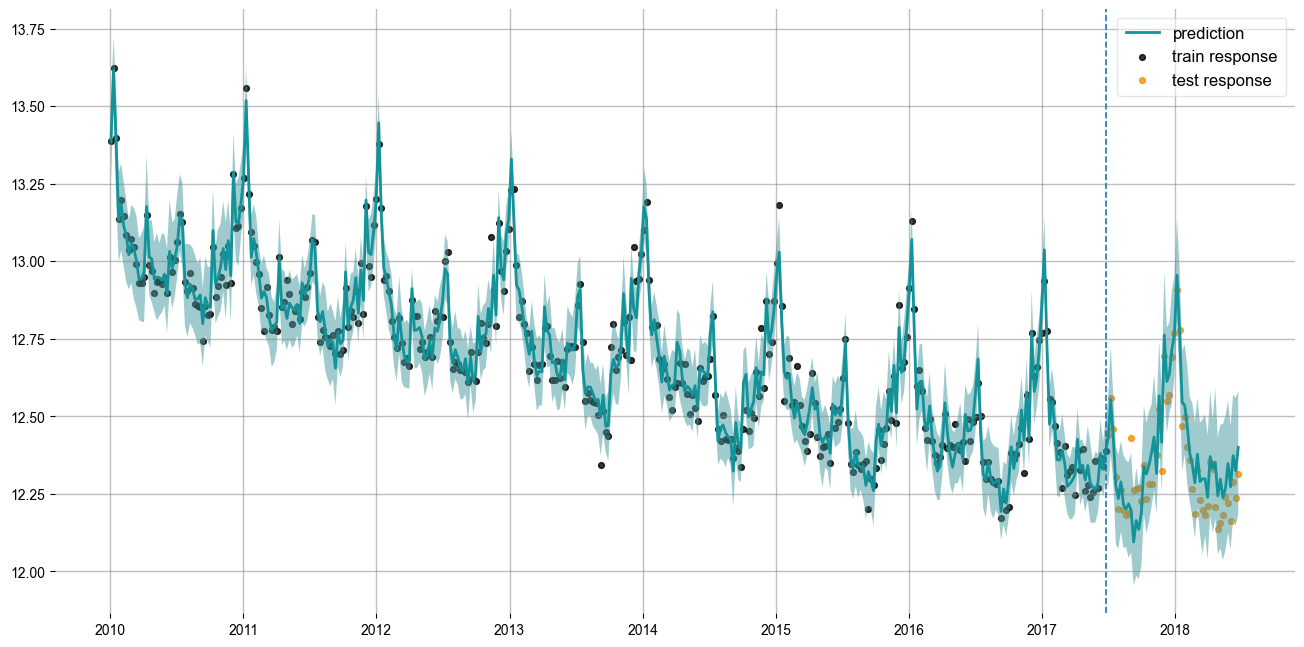

In [14]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col='week',
                        actual_col='claims',
                        test_actual_df=test_df)

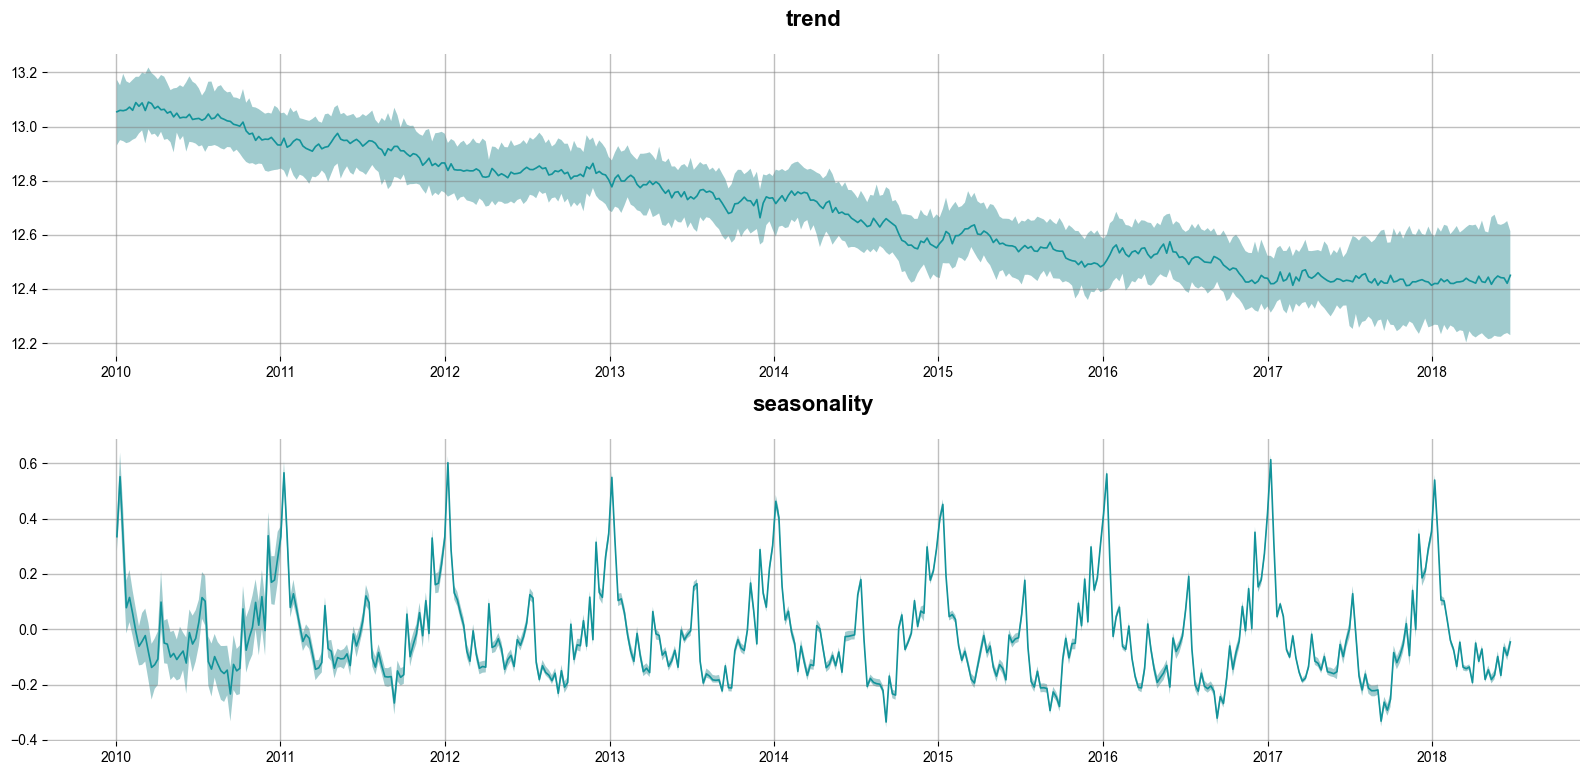

In [15]:
_ = plot_predicted_components(predicted_df=predicted_df, date_col='week')